# Task 2: Perform Data Analysis of Air Pollution due to PM2.5 with respect to diffirent climatic conditions. 

**There are a total of 13 features and over 43000 values in the dataset-**

1. No- Serial Number
2. Year
3. Month
4. Day
5. Hour
6. PM2.5 - PM2.5 concentration (ug/m^3)
7. DEWP - DEWPOINT
8. TEMP - Temperature
9. PRES - Pressure
10. cbwd - Combined Wind Direction
11. Iws - Cummulative wind spees
12. Is - Cummmulated hours of snow 
13. Ir - Cummulated hours of rain 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm25-airpolution-dataset/PRSA_data_2010.1.1-2014.12.31.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/pm25-airpolution-dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
df.sample(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
34484,34485,2013,12,7,20,439.0,-3,0.0,1020.0,cv,0.45,0,0
23604,23605,2012,9,10,12,161.0,20,27.0,1015.0,cv,3.56,0,0
8245,8246,2010,12,10,13,28.0,-15,7.0,1008.0,NW,66.61,0,0
31900,31901,2013,8,22,4,144.0,19,21.0,1008.0,NE,0.89,0,0
34799,34800,2013,12,20,23,46.0,-19,-4.0,1037.0,NE,5.81,0,0
31141,31142,2013,7,21,13,91.0,21,30.0,1005.0,SE,3.13,0,0
35893,35894,2014,2,4,13,10.0,-37,1.0,1030.0,NW,76.00,0,0
15224,15225,2011,9,27,8,282.0,15,16.0,1018.0,cv,0.89,0,0
25651,25652,2012,12,4,19,149.0,-11,-4.0,1021.0,cv,0.89,0,0
30763,30764,2013,7,5,19,24.0,16,32.0,998.0,SE,15.20,0,0


In [5]:
df.shape

(43824, 13)

# Data Wrangling

This includes Assessing the data and cleaning the data

In [6]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [8]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [9]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [10]:
data=df.copy()

In [11]:
#fill the missing values on the basis of forward fill and backward fill
data['pm2.5']=data['pm2.5'].ffill().bfill()

In [12]:
#the wind direction cv in entered wrong, as there is no meaning to it.
#So replacing cv with SW

data['cbwd'].replace('cv','SW',inplace=True)
np.unique(data['cbwd'])

array(['NE', 'NW', 'SE', 'SW'], dtype=object)

In [13]:
#adding date column
date=data[['year','month','day']].apply(lambda x: '-'.join(x.values.astype(str)),axis='columns')

data.insert(5,'date',date)
data['date']=pd.to_datetime(data['date'])

In [14]:
data.head()

,No,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,2010-01-01,129.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,2010-01-01,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,2010-01-01,129.0,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,2010-01-01,129.0,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,2010-01-01,129.0,-20,-12.0,1018.0,NW,12.97,0,0


In [15]:
#dropping No column
data.drop('No',axis=1,inplace=True)

#converting pressure from hPa to atm 1hpa=0.000987 atm
data['PRES']*=0.000987

# Exploratory Data Analysis

> This  invloves creating visualisation charts, performing statistical analysis, infering details from it and record observations

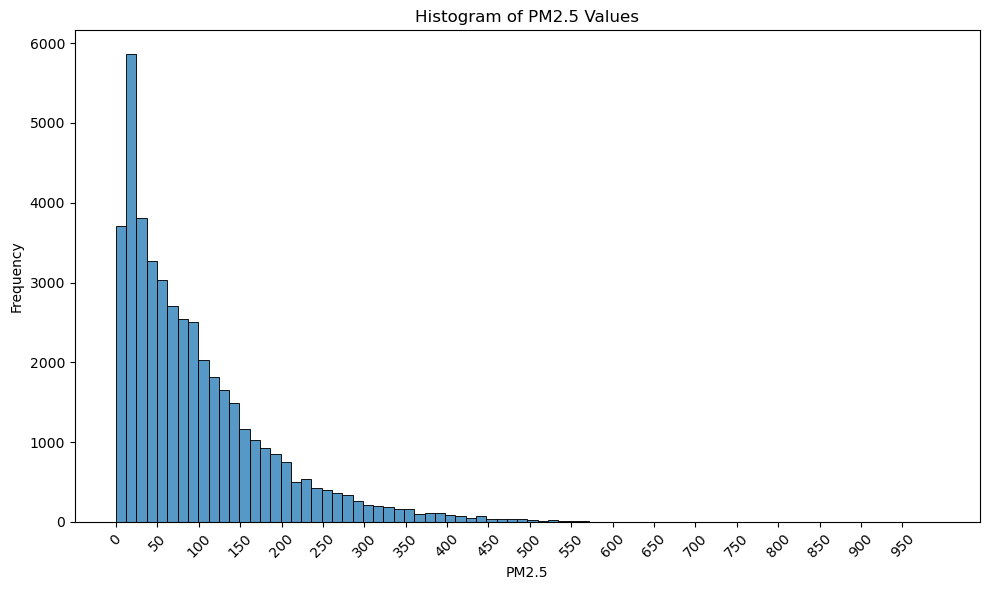

In [16]:
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data, x='pm2.5', bins=80)  # Adjust the number of bins as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Histogram of PM2.5 Values')
plt.xticks(range(0,1000,50))
plt.xlabel('PM2.5')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

> Data is right skewed, with pm2.5 density reaching as high as 1000ug/m^3

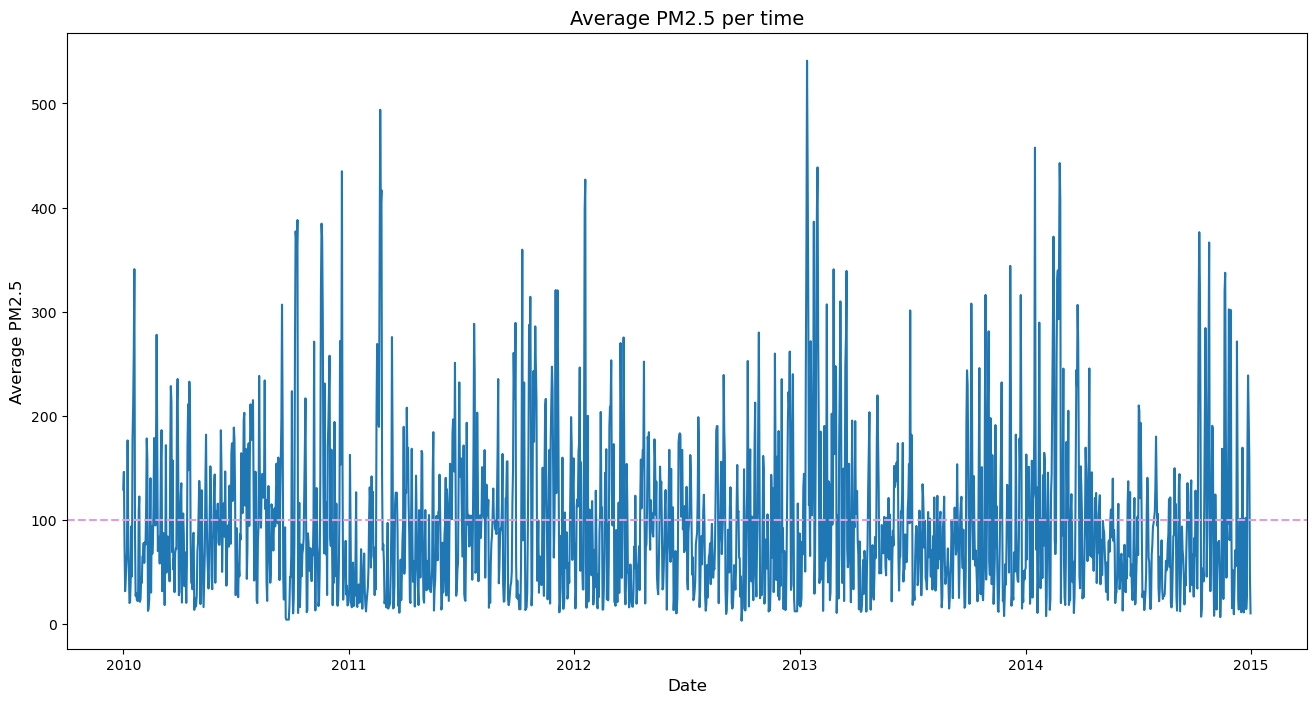

In [17]:
date = data.groupby('date')['pm2.5'].mean()


plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date)
plt.axhline(100, ls= '--', color= 'plum')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

**In 2013 highest pm2.5 density is recorded with value over 500 **

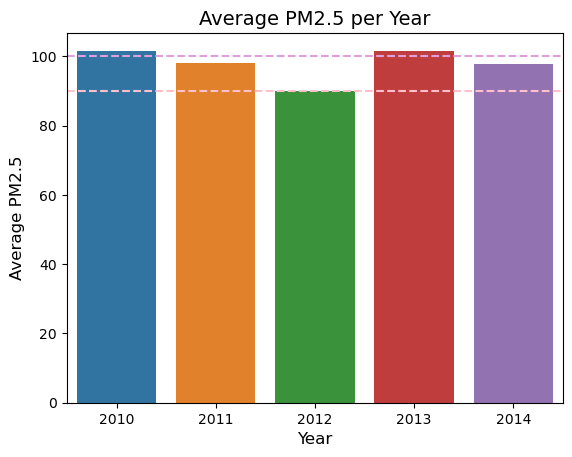

In [18]:
year=data.groupby('year')['pm2.5'].mean()

sns.barplot(x=year.index,y=year.values)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per Year', fontsize = 14)

plt.axhline(100, ls= '--', color= 'plum')
plt.axhline(90, ls= '--', color= 'pink')
plt.show()

<Figure size 1600x800 with 0 Axes>

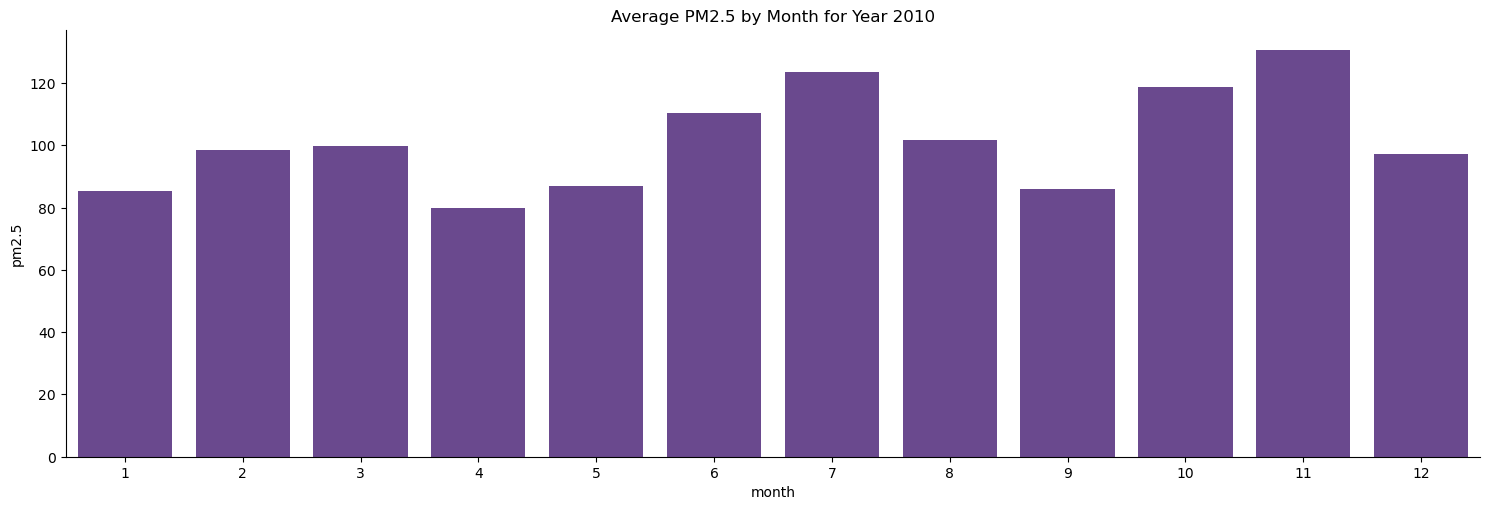

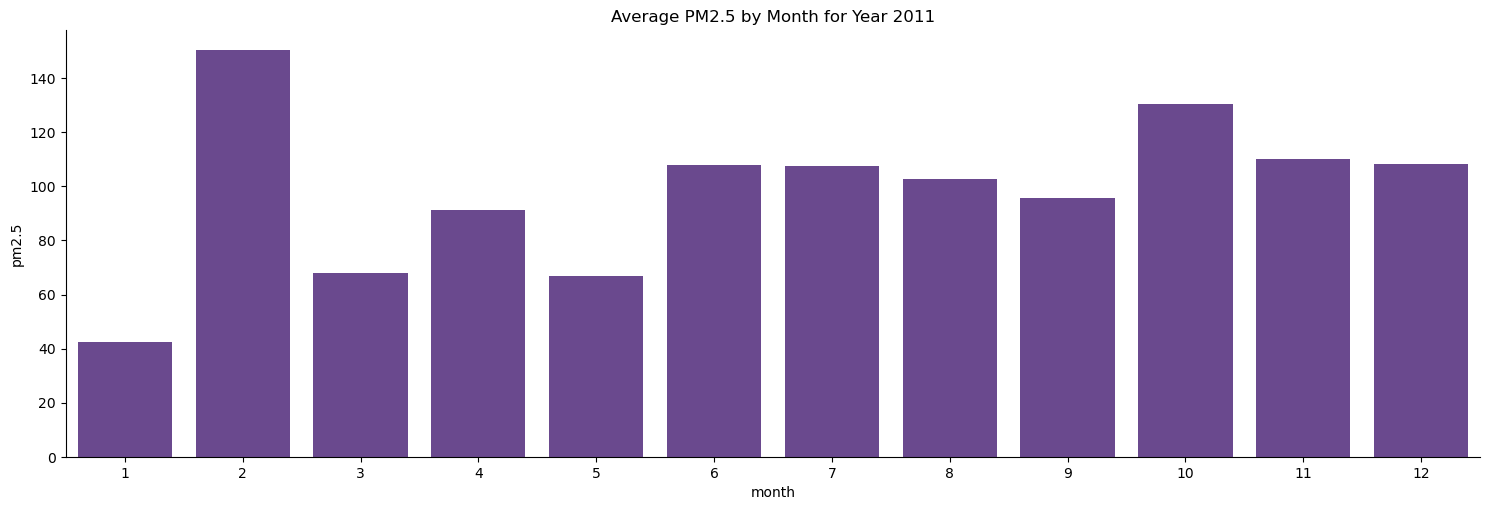

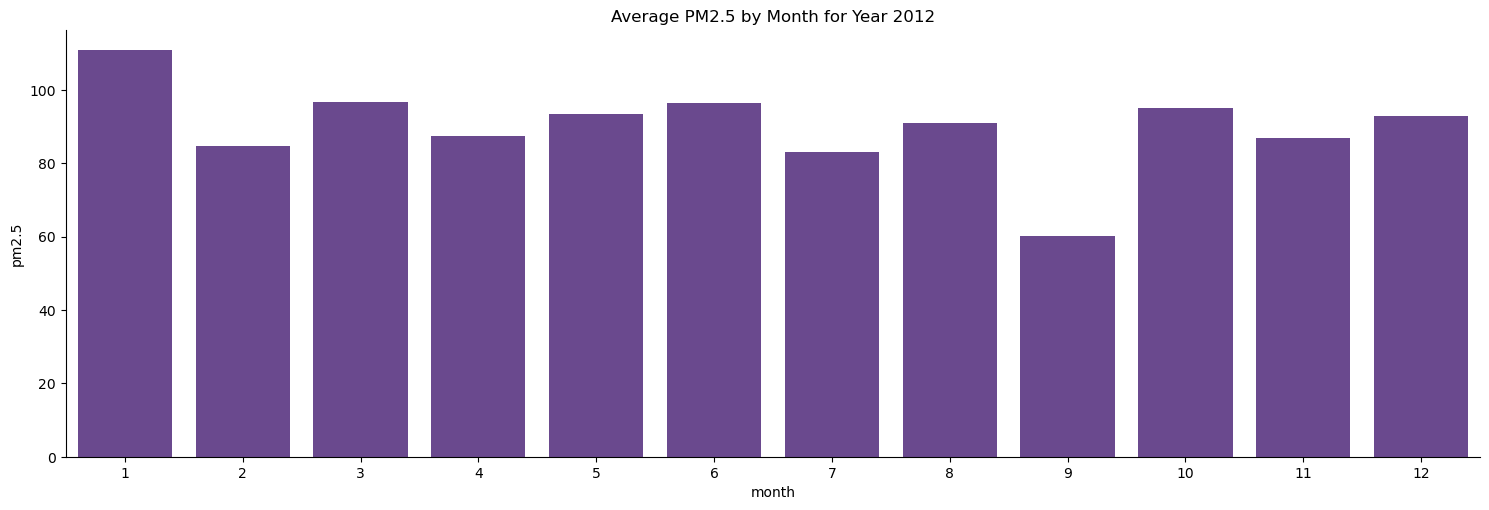

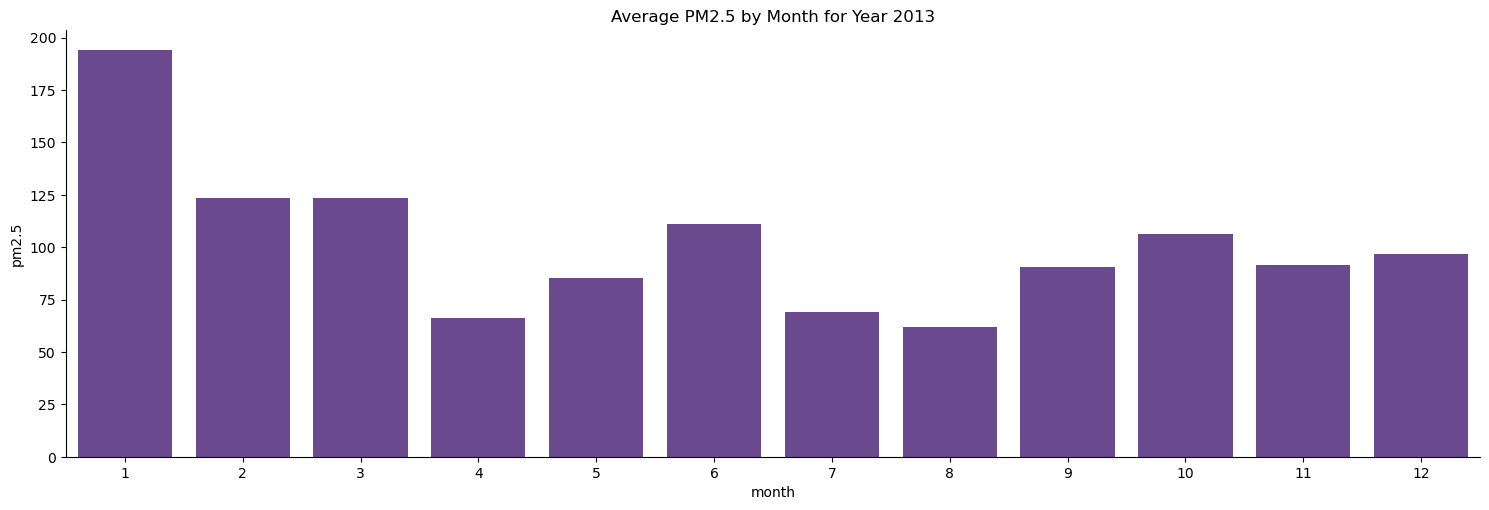

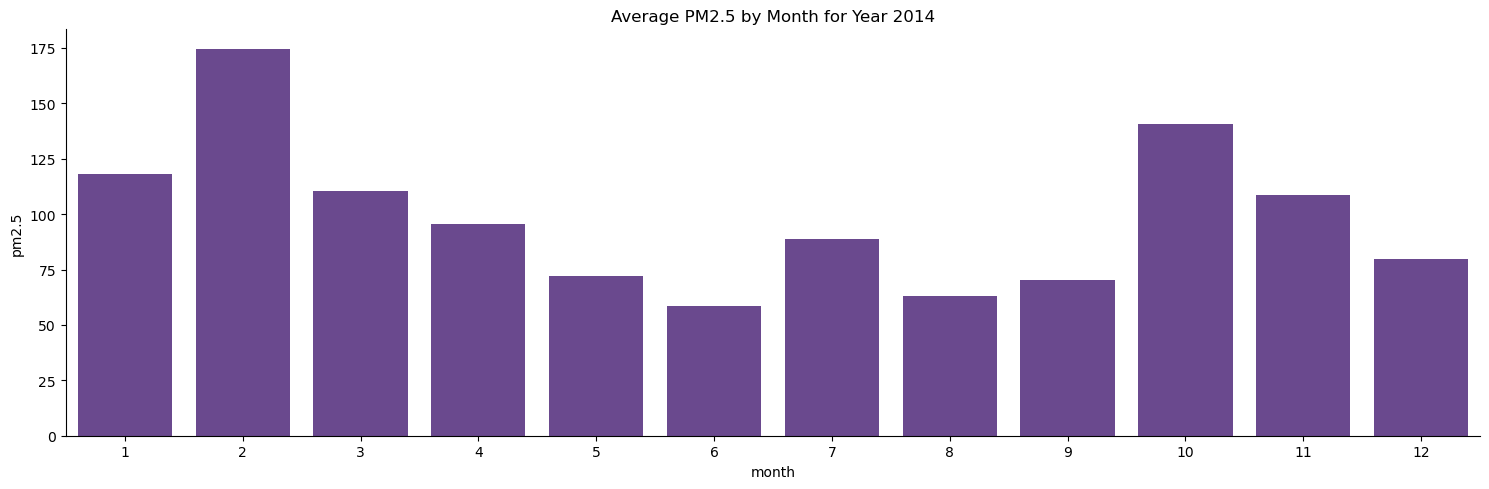

In [19]:
month=data.groupby(['year','month'])['pm2.5'].mean()
years=month.index.get_level_values('year').unique()
base_color = sns.color_palette("Paired")[9]

plt.figure(figsize=(16,8))
for year in years:
    new=month.loc[year].reset_index()
    sns.catplot(data=new,x='month',y='pm2.5',kind='bar',color=base_color,height=5,aspect=3)
    #plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title(f'Average PM2.5 by Month for Year {year}')

plt.tight_layout()
plt.show()

<Axes: >

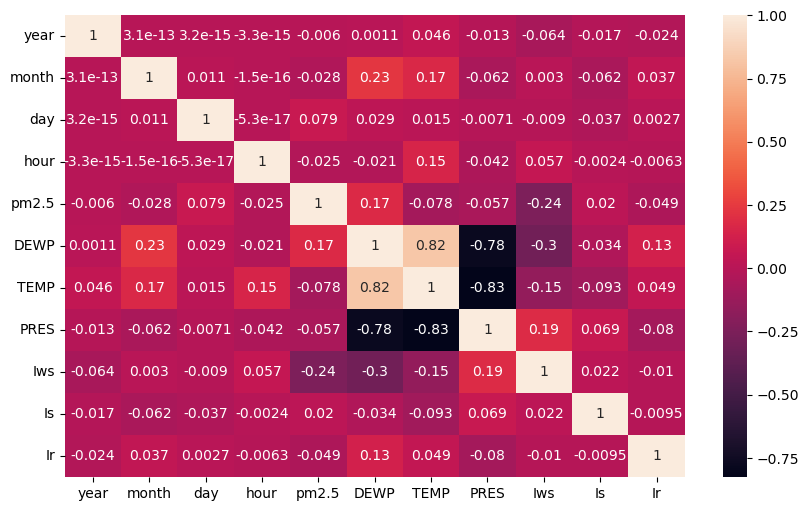

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

> Comparatively pm2.5 concentration has a better correlation with windspeed among other climatic paraameters.
> > It has negative correlation of 0.25 

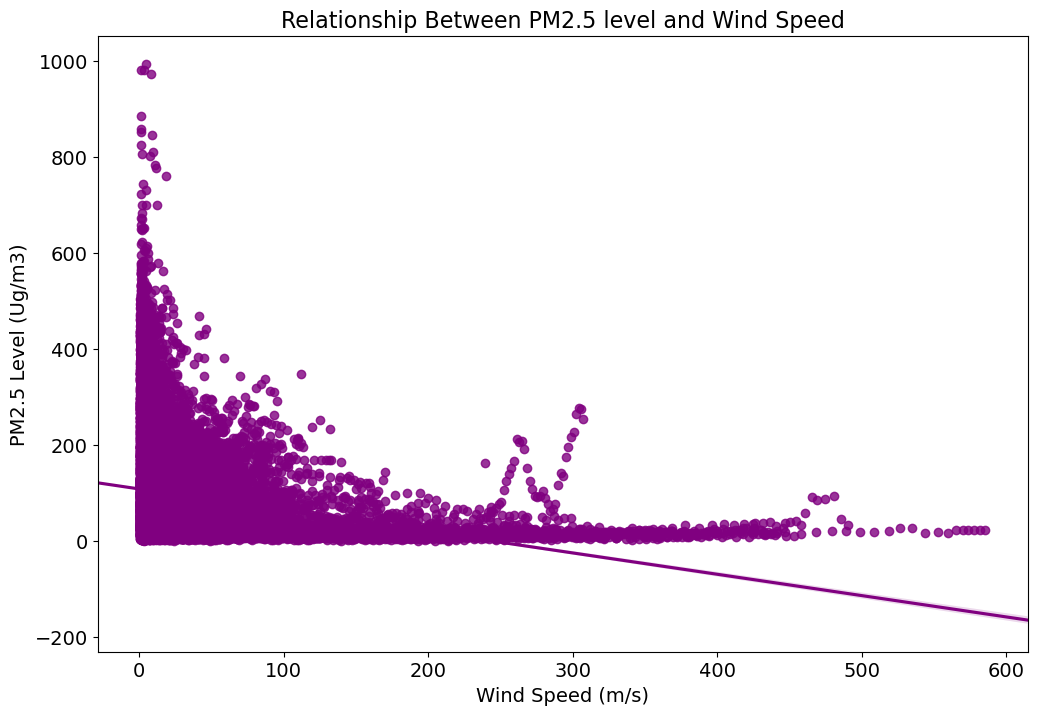

In [21]:
plt.figure(figsize= (12,8))
sns.regplot(x = 'Iws', y = 'pm2.5', data = data, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Wind Speed (m/s)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Wind Speed", fontsize= 16)
plt.show();

<Axes: xlabel='TEMP', ylabel='pm2.5'>

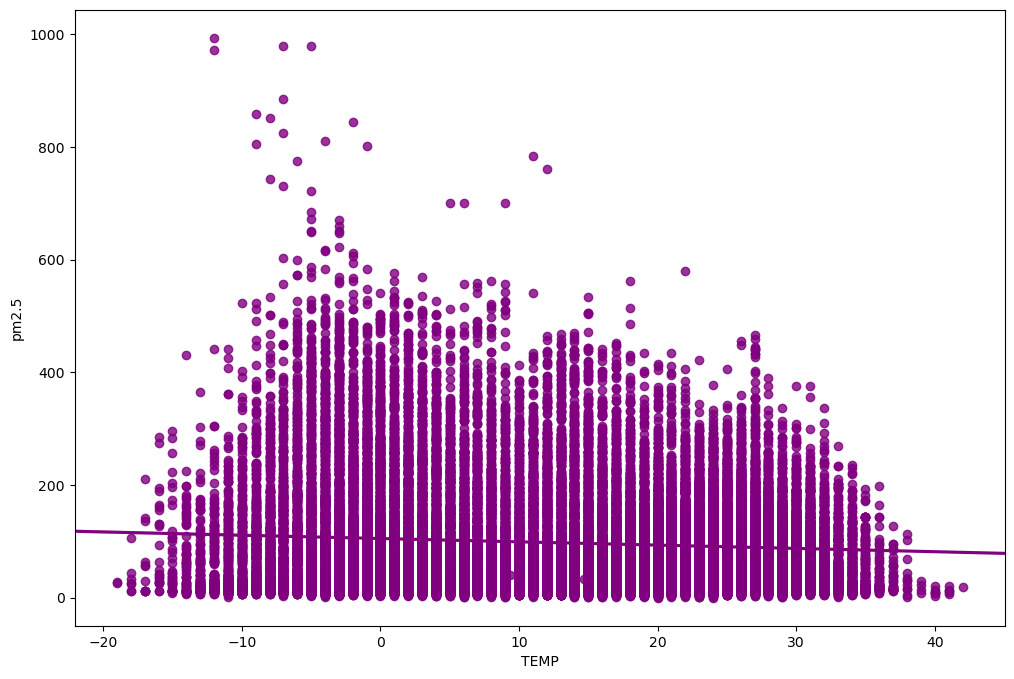

In [22]:
plt.figure(figsize= (12,8))
sns.regplot(x = 'TEMP', y = 'pm2.5', data = data, color = 'purple', truncate= False)

In [23]:
#one-hot encoding for categorical variables
data=pd.get_dummies(data,columns=['cbwd'],drop_first=True)
data.head()

,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_SW
0,2010,1,1,0,2010-01-01,129.0,-21,-11.0,1.007727,1.79,0,0,1,0,0
1,2010,1,1,1,2010-01-01,129.0,-21,-12.0,1.006740,4.92,0,0,1,0,0
2,2010,1,1,2,2010-01-01,129.0,-21,-11.0,1.005753,6.71,0,0,1,0,0
3,2010,1,1,3,2010-01-01,129.0,-21,-14.0,1.005753,9.84,0,0,1,0,0
4,2010,1,1,4,2010-01-01,129.0,-20,-12.0,1.004766,12.97,0,0,1,0,0


In [24]:
#Normalization of quantitaitve features
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
columns_to_scale=['DEWP','TEMP','PRES','Iws']
data[columns_to_scale]=sts.fit_transform(data[columns_to_scale])

In [25]:
X=data.drop(['year','month','hour','day','date','pm2.5','Is','Ir'],axis=1)
y=data['pm2.5']

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid=GridSearchCV(ridge,params,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Best value for lambda :  {'alpha': 5}
Best score for cost function:  -6387.094884441916


In [29]:
best_ridge=Ridge(alpha=5)
best_ridge.fit(X_train,y_train)
y_pred1=best_ridge.predict(X_test)

<Axes: xlabel='pm2.5', ylabel='Density'>

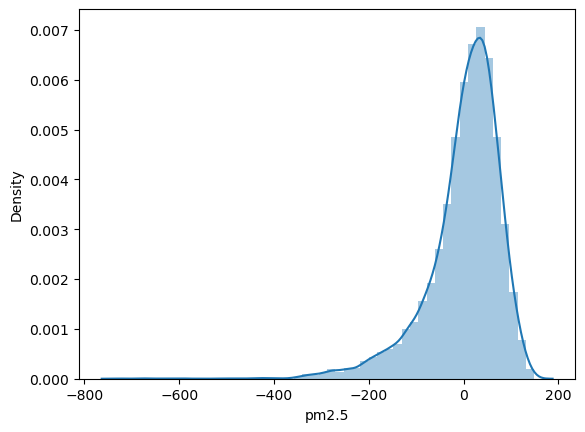

In [30]:
sns.distplot(y_pred1-y_test)

In [31]:
rf=RandomForestRegressor()
params={
    'max_features': ['log2'],
    'n_estimators': [300,1000]}
grid= GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 10, verbose = 2)
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END ................max_features=log2, n_estimators=300; total time=  12.9s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.6s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.7s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.5s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.7s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.5s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.5s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.6s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.4s
[CV] END ................max_features=log2, n_estimators=300; total time=  12.5s
[CV] END ...............max_features=log2, n_estimators=1000; total time=  42.2s
[CV] END ...............max_features=log2, n_est

In [32]:
best_rf=grid.best_estimator_
best_rf.fit(X_train,y_train)
y_pred2=best_rf.predict(X_test)

<Axes: xlabel='pm2.5', ylabel='Density'>

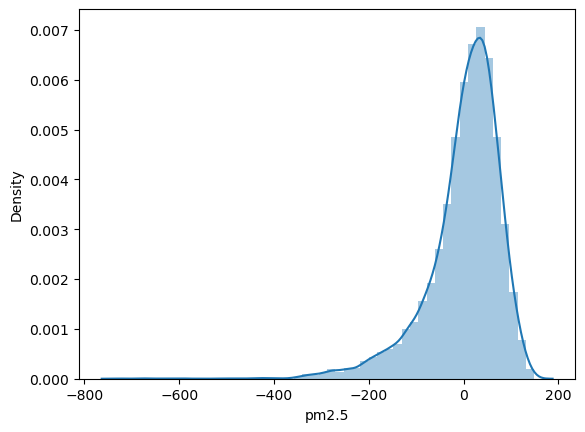

In [33]:
sns.distplot(y_pred1-y_test)

In [34]:
print('Root Mean Squared Error of Ridge Regressor is ',mean_squared_error(y_pred1,y_test,squared=False))
print('Root Mean Squared Error of random Forest Regressor is ',mean_squared_error(y_pred2,y_test,squared=False))

Root Mean Squared Error of Ridge Regressor is  79.1200932536693
Root Mean Squared Error of random Forest Regressor is  70.32999455087493
